# ____________________________________________________________________________________________________________________________________________________________

# Practical Lab 1 - Univariate Linear Regression on the California Housing Prices Dataset

#### In this lab, I'm going to train 3 univariate linear regression models. I will utilize the independent variables 
##### _"median_income"_, _"population"_ and _"households"_ 
#### to predect the dependent variable which is 
##### _"median_house_value"_ 
##### Three models should be trained, one for each independent variable, and finally, I will determine which model in the 3 models has the best accuracy in predicting the dependent variable by analyzing the outcomes of each model.

# ____________________________________________________________________________________________________________________________________________________________

# The source of the _"california-housing-prices"_ dataset is in [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).


# ____________________________________________________________________________________________________________________________________________________________

###                         __Name and description of each column__

##### 1. longitude: A measure of how far west a house is; a higher value is farther west
##### 2. latitude: A measure of how far north a house is; a higher value is farther north
##### 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
##### 4. totalRooms: Total number of rooms within a block
##### 5. totalBedrooms: Total number of bedrooms within a block
##### 6. population: Total number of people residing within a block
##### 7. households: Total number of households, a group of people residing within a home unit, for a block
##### 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
##### 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
##### 10. oceanProximity: Location of the house w.r.t ocean/sea

# ____________________________________________________________________________________________________________________________________________________________

#### Importing required libraries to be used in lab

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl 
import numpy as np 
%matplotlib inline
import seaborn as sns

# Explanatory Data Analysis

In [263]:
house_DF = pd.read_csv("C:/Users/binkh/OneDrive/Desktop/CSCN8010_Foundations of Machine Learning Frameworks/housing.csv")
house_DF.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [264]:
house_DF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### After looking at the dataset, It is observed that all variables have __20640__ values stored except _total_bedrooms_ with __20433__

In [265]:
#in this step i should develop a new dataframe which consists of the numerical values only ("chosen data only")

Num_housedf = house_DF[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]
Num_housedf.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


In [266]:
print(Num_housedf.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


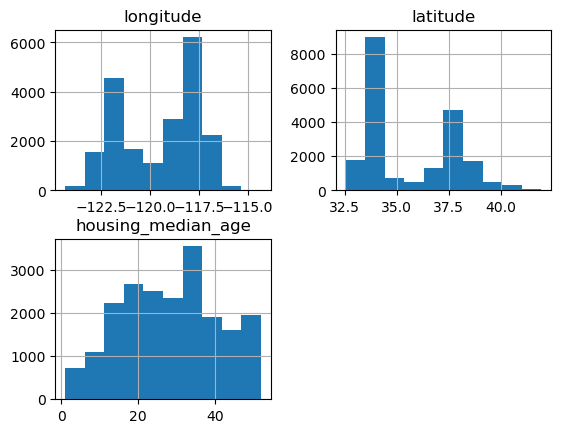

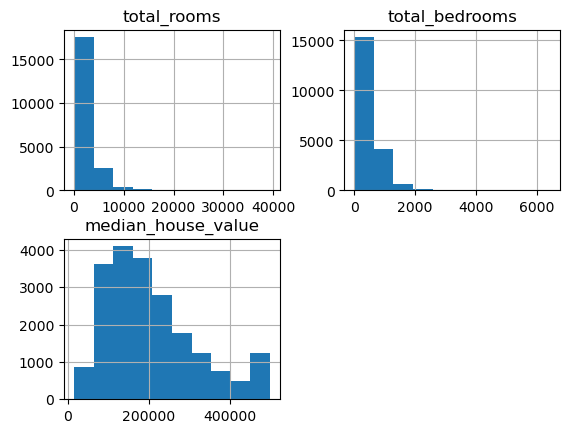

In [267]:
#visiulaixing to understand how the data is distributed
Viz1 = Num_housedf[['longitude','latitude','housing_median_age']]
Viz1.hist()
Viz2 = Num_housedf[['total_rooms','total_bedrooms','median_house_value']]
Viz2.hist()
plt.show()

##### Those graphs show the distribution of each value in a single variable

In [268]:
correlation_matrix = Num_housedf.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


##### The correlation matrix is a tabular representation of the correlation coefficients among the variables in a dataset. With values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), each value in the matrix indicates the degree and direction of the association between two variables. It is obvious that each variable has a __1__ value with itself, 1 means that there is a perfect positive correlation.
##### Some other observations are;
##### longitude	and latitude have a strong negative correlation = __-0.924664__	
##### the highest correlation with the independent variable "median_house_value" is the dependent variable "median_income" with a correlation coefficient of __0.688075__


<function matplotlib.pyplot.show(close=None, block=None)>

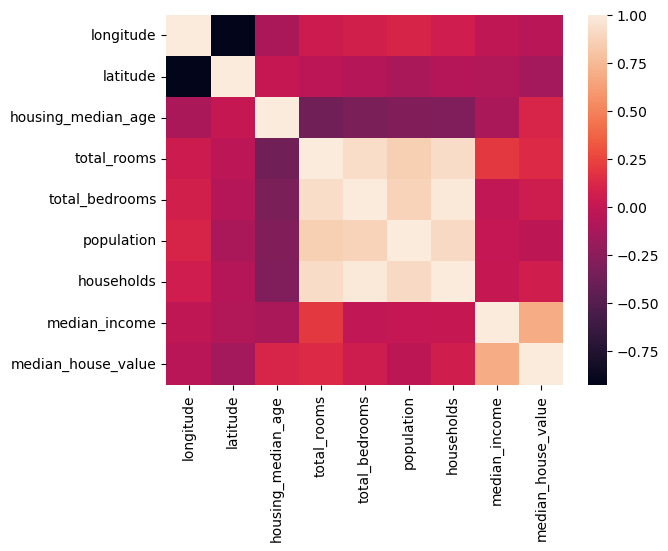

In [269]:
sns.heatmap(correlation_matrix)
plt.show

##### This is a visiual representation of the correlation matrix.

### __plotting__ 
##### _median income_
##### _population_
##### _number of households_
### __against__ 
##### _median_house_value_

<function matplotlib.pyplot.show(close=None, block=None)>

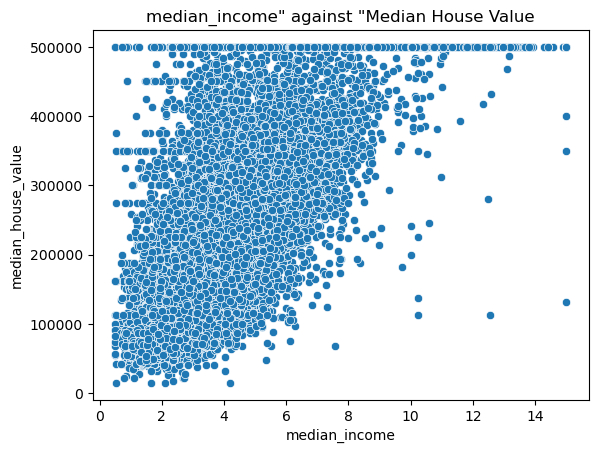

In [270]:
#scatter plot to visiualize median income and median house value
sns.scatterplot(x=Num_housedf.median_income,y=Num_housedf.median_house_value)
plt.title('median_income" against "Median House Value')
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

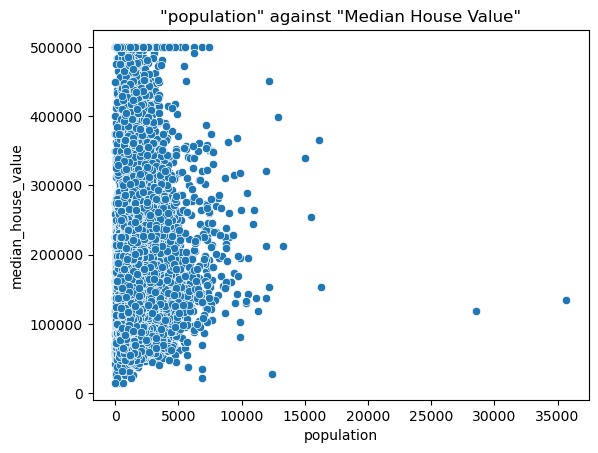

In [271]:
#scatter plot to visiualize population and median house value
sns.scatterplot(x=Num_housedf.population,y=Num_housedf.median_house_value)
plt.title('"population" against "Median House Value"')
plt.xlabel("population")
plt.ylabel("median_house_value")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

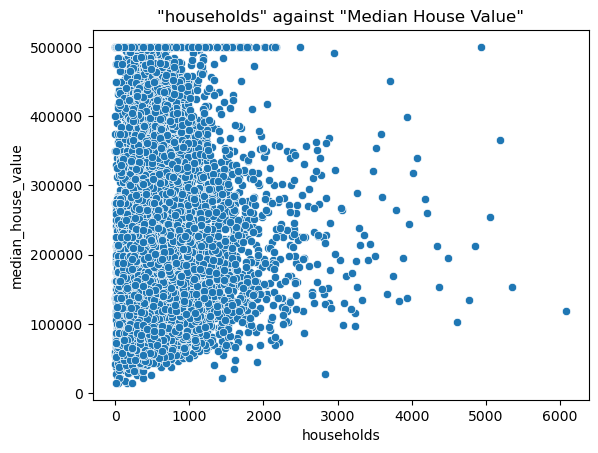

In [272]:
#scatter plot to visiualize total number of households and median house value
sns.scatterplot(x=Num_housedf.households,y=Num_housedf.median_house_value)
plt.title('"households" against "Median House Value"')
plt.xlabel("households")
plt.ylabel("median_house_value")
plt.show

# ____________________________________________________________________________________________________________________________________________________________

##### in the following code, outliers will be detected according to the Inter Quartile Range (IQR) and then printed


In [273]:
# this cell was to determine the number of outliers of the median income, I have done this by finding the Inter Quartile Range(IQR)
#After finding the IQR, I set the lower boundary and the higher boundary to determine the outliers outside those boundaries.
#IQR = 25th percentile of Median income - 75th percentile of median income
import math
  
#median income outliers
mi_25p = Num_housedf['median_income'].quantile(0.25) 
mi_75p = Num_housedf['median_income'].quantile(0.75)
IQR = mi_75p - mi_25p

lower_boundary_squared = (mi_25p - (IQR*1.5))**2
lower_boundary = math.sqrt(lower_boundary_squared)
upper_boundary = mi_75p + (IQR*1.5) 

#median house value outliers
mhv_25p = Num_housedf['median_house_value'].quantile(0.25)
mhv_75p = Num_housedf['median_house_value'].quantile(0.75)
IQR2 = mhv_75p - mhv_25p

lower_boundary2_squared = (mhv_25p - (IQR2*1.5))**2
lower_boundary2 = math.sqrt(lower_boundary2_squared)
upper_boundary2 = mhv_75p + (IQR2*1.5)

#population outliers
pop_25p = Num_housedf['population'].quantile(0.25)
pop_75p = Num_housedf['population'].quantile(0.75)
IQR3 = pop_75p - pop_25p

lower_boundary3_squared = (pop_25p - (IQR3*1.5))**2
lower_boundary3 = math.sqrt(lower_boundary3_squared)
upper_boundary3 = pop_75p + (IQR3*1.5)

#households outliers
hh_25p = Num_housedf['households'].quantile(0.25)
hh_75p = Num_housedf['households'].quantile(0.75)
IQR4 = hh_75p - hh_25p

lower_boundary4_squared = (hh_25p - (IQR4*1.5))**2
lower_boundary4 = math.sqrt(lower_boundary4_squared)
upper_boundary4 = hh_75p + (IQR4*1.5)


outliers_1 = Num_housedf[(Num_housedf['median_income'] > upper_boundary) | (Num_housedf['median_income'] < lower_boundary) &
                       (Num_housedf['median_house_value'] > upper_boundary2) | (Num_housedf['median_house_value'] < lower_boundary2) &
                       (Num_housedf['population'] > upper_boundary3) | (Num_housedf['population'] < lower_boundary3)&
                       (Num_housedf['households'] > upper_boundary4) | (Num_housedf['households'] < lower_boundary4)


]
# outliers.shape
outliers_1
# I found that there are 681 outliers based on the IQR

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0
...,...,...,...,...,...,...,...,...,...
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0


##### So there are outliers in __681__ rows, outliers will be removed based on the __IQR__ from both the "_median_income_" and the _"median_house_value"_

In [274]:
# Determining the 1st and the 3rd quartiles, then finding the IQR, and finally, calculating the lower and the upper boundaries

mi_25p = Num_housedf['median_income'].quantile(0.25) 
mi_75p = Num_housedf['median_income'].quantile(0.75)
IQR = mi_75p - mi_25p

lower_boundary = mi_25p - (IQR*1.5)
upper_boundary = mi_75p + (IQR*1.5)

mhv_25p = Num_housedf['median_house_value'].quantile(0.25)
mhv_75p = Num_housedf['median_house_value'].quantile(0.75)
IQR2 = mhv_75p - mhv_25p

lower_boundary2 = mhv_25p - (IQR2*1.5)
upper_boundary2 = mhv_75p + (IQR2*1.5) 


IQR_df = Num_housedf[
    (Num_housedf['median_income'] >= lower_boundary) & (Num_housedf['median_income'] <= upper_boundary) & 
    (Num_housedf['median_house_value'] >= lower_boundary2) & (Num_housedf['median_house_value'] <= upper_boundary2) &
    (Num_housedf['population'] <= upper_boundary3) & (Num_housedf['population'] >= lower_boundary3)&
    (Num_housedf['households'] <= upper_boundary4) & (Num_housedf['households'] >= lower_boundary4)

]
shapeIQR = IQR_df.shape
print("This is the shape of the new dataframe IQR_df",shapeIQR) 
IQR_df.describe()


This is the shape of the new dataframe IQR_df (14756, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14756.00000,14756.000000,14756.000000,14756.000000,14614.000000,14756.000000,14756.000000,14756.000000,14756.000000
mean,-119.54110,35.597475,28.827189,2488.283749,513.689476,1380.739292,480.538696,3.638582,190095.256099
std,1.99088,2.132023,12.096818,1117.464880,218.174846,551.142492,190.257551,1.435864,93061.591793
min,-124.35000,32.540000,1.000000,350.000000,187.000000,620.000000,208.000000,0.549500,14999.000000
25%,-121.71000,33.930000,19.000000,1686.000000,348.000000,948.000000,333.000000,2.555175,117600.000000
50%,-118.46000,34.250000,29.000000,2237.000000,464.000000,1259.000000,437.000000,3.463300,173600.000000
75%,-118.00000,37.690000,37.000000,3044.000000,631.000000,1696.000000,590.000000,4.546100,244800.000000
max,-114.31000,41.950000,52.000000,12342.000000,2634.000000,3132.000000,1092.000000,8.011300,482200.000000


##### I have created a new dataframe called __"IQR_df"__, the outliers in the median_house_value and the median_income were removed from this dataframe by using the IQR method

# ____________________________________________________________________________________________________________________________________________________________

# Dataset splitting and linear regression fitting

#### Now we will split the dataset into 2 sets
##### _Training set_ : this set will be used by the ML model to read the data and train from it.
##### _Testing set_: this set will be used by the ML model to measure its accuracy by comparing the results predicted against the actual results available from data. 

In [275]:
dataset = np.random.rand(len(IQR_df)) < 0.8
train = IQR_df[dataset]
test = IQR_df[~dataset]

Text(0.5, 1.0, '"Train split" vs "Test split of" of median_income against median_house_value')

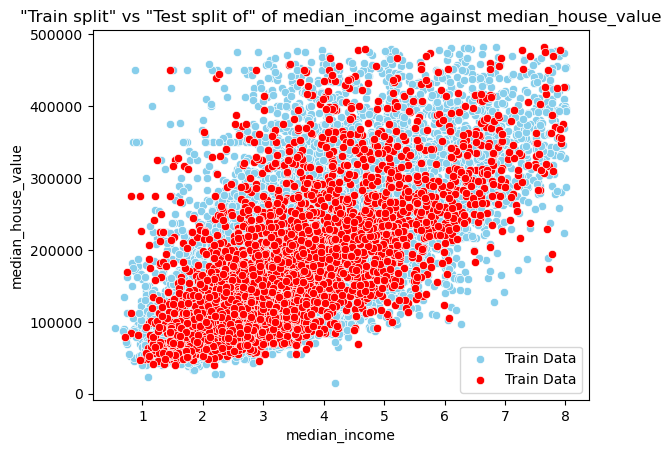

In [276]:
sns.scatterplot(x = train.median_income,y=train.median_house_value,color ="skyblue",label='Train Data')
sns.scatterplot(x = test.median_income,y=test.median_house_value,color = "red",label='Train Data')
plt.title('"Train split" vs "Test split of" of median_income against median_house_value')

### Model Number __1__: Independent variable = __median_income__ and dependent variable = __median_house_value__ 

In [277]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [278]:
train_x = np.asanyarray(train["median_income"])
train_y = np.asanyarray(train["median_house_value"])

In [279]:
train_x = train_x.reshape(-1, 1)    #Expected 2D array, got 1D array instead:

regr.fit(train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [41929.74679992]
Intercept:  38159.09553067642


Text(0.5, 1.0, 'Regression line of median_income against median_house_value ')

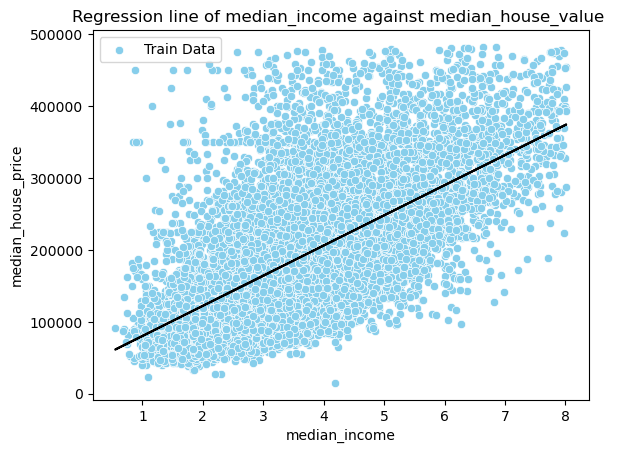

In [280]:
sns.scatterplot(x = train.median_income,y=train.median_house_value,color ="skyblue",label='Train Data')

plt.plot(train_x, regr.coef_[0]*train_x + regr.intercept_,label='Regression Line', color= 'black')
plt.xlabel('median_income')
plt.ylabel('median_house_price')
plt.title("Regression line of median_income against median_house_value ")

In [281]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['median_income']])
test_y = np.asanyarray(test[['median_house_value']])
test_y_ = regr.predict(test_x)

mae1= np.mean(np.absolute(test_y_ - test_y))
mse1=np.mean((test_y_ - test_y) ** 2)
coef_1 = regr.coef_
intercept_1 = regr.intercept_

print("Mean absolute error: %.2f" % mae1)
print("Residual sum of squares (MSE): %.2f" % mse1)
print ('Coefficients: ', coef_1)
print ('Intercept: ',intercept_1)

Mean absolute error: 87589.76
Residual sum of squares (MSE): 12112917193.31
Coefficients:  [41929.74679992]
Intercept:  38159.09553067642


### Model Number __2__: Independent variable = __population__ and dependent variable = __median_house_value__ 

In [282]:
dataset2 = np.random.rand(len(IQR_df)) < 0.8
train2 = IQR_df[dataset2]
test2 = IQR_df[~dataset2]

Text(0.5, 1.0, '"Train split" vs "Test split" for population against median_house_value')

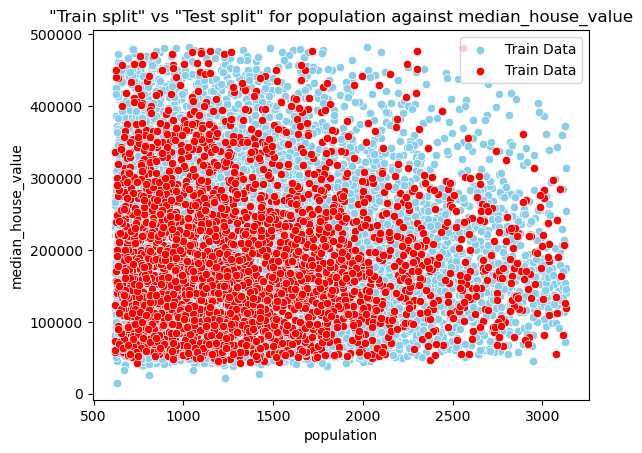

In [283]:
sns.scatterplot(x = train2.population,y=train2.median_house_value,color ="skyblue",label='Train Data')
sns.scatterplot(x = test2.population,y=test2.median_house_value,color = "red",label='Train Data')
plt.title('"Train split" vs "Test split" for population against median_house_value')

In [284]:
from sklearn import linear_model
regr2 = linear_model.LinearRegression()

In [285]:
train_x2 = np.asanyarray(train2["population"])
train_y2 = np.asanyarray(train2["median_house_value"])

In [286]:
train_x2 = train_x2.reshape(-1, 1)    #Expected 2D array, got 1D array instead:error fixed

regr2.fit(train_x2, train_y2)
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [-5.42259049]
Intercept:  198040.38955299152


Text(0.5, 1.0, 'Regression line of population against median_house_price ')

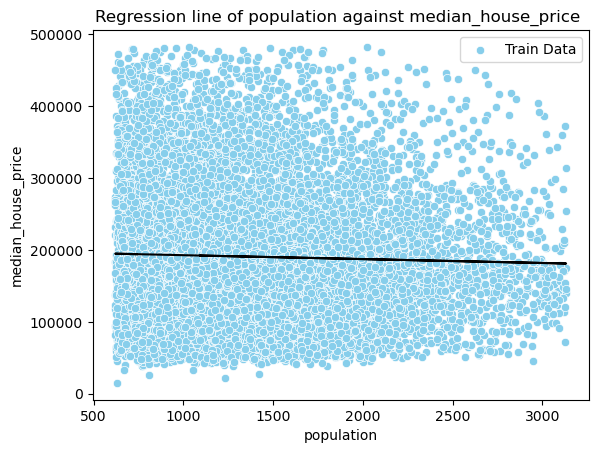

In [287]:
sns.scatterplot(x = train2.population,y=train2.median_house_value,color ="skyblue",label='Train Data')

plt.plot(train_x2, regr2.coef_[0]*train_x2 + regr2.intercept_,label='Regression Line', color= 'black')
plt.xlabel('population')
plt.ylabel('median_house_price')
plt.title("Regression line of population against median_house_price ")

In [288]:
from sklearn.metrics import r2_score

test_x2 = np.asanyarray(test2[['population']])
test_y2 = np.asanyarray(test2[['median_house_value']])
test_y2_ = regr2.predict(test_x2)

mae2= np.mean(np.absolute(test_y2_ - test_y2))
mse2= np.mean((test_y2_ - test_y2) ** 2)
coef_2 = regr2.coef_
intercept_2 = regr2.intercept_

print("Mean absolute error: %.2f" % mae2)
print("Residual sum of squares (MSE): %.2f" % mse2)
print ('Coefficients: ', coef_2)
print ('Intercept: ',intercept_2)

Mean absolute error: 75390.29
Residual sum of squares (MSE): 8647532653.02
Coefficients:  [-5.42259049]
Intercept:  198040.38955299152


### Model Number __3__: Independent variable = __households__ and dependent variable = __median_house_value__ 

In [289]:
dataset3 = np.random.rand(len(IQR_df)) < 0.8
train3 = IQR_df[dataset3]
test3 = IQR_df[~dataset3]

Text(0.5, 1.0, '"Train split" vs "Test split" of households against median_house_value')

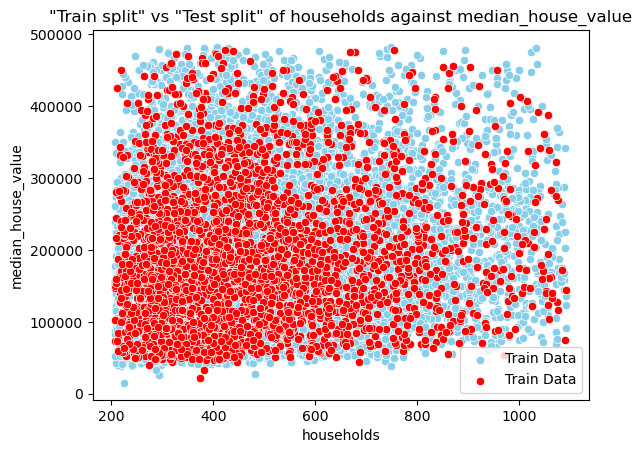

In [290]:
sns.scatterplot(x = train3.households,y=train3.median_house_value,color ="skyblue",label='Train Data')
sns.scatterplot(x = test3.households,y=test3.median_house_value,color = "red",label='Train Data')
plt.title('"Train split" vs "Test split" of households against median_house_value')

In [291]:
from sklearn import linear_model
regr3 = linear_model.LinearRegression()

In [292]:
train_x3 = np.asanyarray(train3["households"])
train_y3 = np.asanyarray(train3["median_house_value"])

In [293]:
train_x3 = train_x3.reshape(-1, 1)    #Expected 2D array, got 1D array instead:

regr3.fit(train_x3, train_y3)
print ('Coefficients: ', regr3.coef_)
print ('Intercept: ',regr3.intercept_)

Coefficients:  [64.29296337]
Intercept:  158538.45067402362


Text(0.5, 1.0, 'Regression line of households vs median_house_price ')

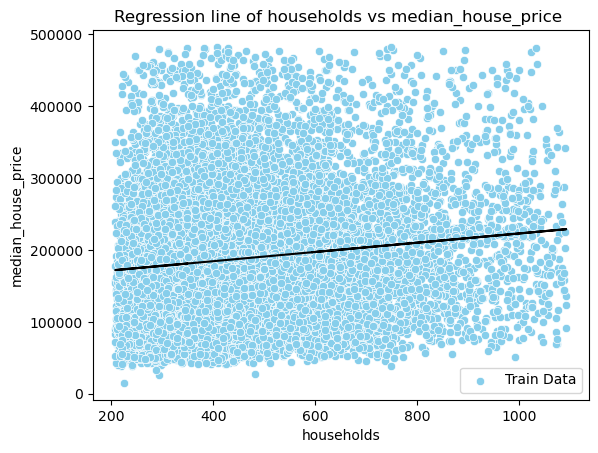

In [294]:
sns.scatterplot(x = train3.households,y=train3.median_house_value,color ="skyblue",label='Train Data')

plt.plot(train_x3, regr3.coef_[0]*train_x3 + regr3.intercept_,label='Regression Line', color= 'black')
plt.xlabel('households')
plt.ylabel('median_house_price')
plt.title("Regression line of households vs median_house_price ")

In [295]:
from sklearn.metrics import r2_score

test_x3 = np.asanyarray(test3[['households']])
test_y3 = np.asanyarray(test3[['median_house_value']])
test_y3_ = regr3.predict(test_x3)

mae3= np.mean(np.absolute(test_y3_ - test_y3))
mse3= np.mean((test_y3_ - test_y3) ** 2)
coef_3 = regr3.coef_
intercept_3 = regr3.intercept_

print("Mean absolute error: %.2f" % mae3) # y_hat(y_) = predicted and y = actual, so predicted - actual
print("Residual sum of squares (MSE): %.2f" % mse3) 
print ('Coefficients: ', regr3.coef_)
print ('Intercept: ',regr3.intercept_)

Mean absolute error: 77062.56
Residual sum of squares (MSE): 9195417571.03
Coefficients:  [64.29296337]
Intercept:  158538.45067402362


In [296]:
summarytable = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Mean Absolute Error': [mae1, mae2, mae3],
    'Mean Squared Error': [mse1, mse2, mse3],
    'Coefficients': [coef_1, coef_2, coef_3],
    'Intercept': [intercept_1, intercept_2, intercept_3]
}

# Creating the DataFrame
results_df = pd.DataFrame(summarytable)

# Display the table
results_df

,Model,Mean Absolute Error,Mean Squared Error,Coefficients,Intercept
0,Model 1,87589.758847,1.211292e+10,[41929.74679992229],38159.095531
1,Model 2,75390.286951,8.647533e+09,[-5.422590488899846],198040.389553
2,Model 3,77062.563137,9.195418e+09,[64.29296336713038],158538.450674


# ____________________________________________________________________________________________________________________________________________________________

### Analysis

#### Model 2 yields, on average, the smallest prediction errors and penalizes huge errors less than the other models because it has the lowest MAE and MSE.

#### Compared to Models 2 and 3, Model 1's MAE and MSE are significantly greater, indicating that it is less accurate.

#### in terms of MAE and MSE, Model 3 is slightly less successful than Model 2, but it is comparable to Model 2.

#### After removing the outliers by using the IQR, I received a better results on the evaluation metrics ("MAE"and "MSE")

#### so in general , __model 2__ is the best as it has the lowest MAE and MSE values

#### I have applied some of the techniques from a course I have learned from [IBM-Coursera](https://www.coursera.org/professional-certificates/ai-engineer).
